# Since this project is based on a competition hosted in Analytics Vidhya, the following code will be a complete solution in the perspective of the particular problem (Her we use a simple base technique Loistic Regression. Other Algorithms may give better accuracy for this problem) 
Courtesy https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

# Import Training and Testing data as csv files

# (For Understanding the Problem Statement, read the README file)

In [11]:
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

In [12]:
train_original=train.copy() # for keeping a copy of original data
test_original=test.copy()   # for keeping a copy of original data

# Data Analysis Beginning. For effective modeling of a NN, the domain knowledge is necessary. So here we analyze Data and get some results which may be helpful for our model

# Checking the columns of Train and Test data

In [13]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Finding the DATA TYPEs of the Columns

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking the shape of the data

In [16]:
train.shape, test.shape

((614, 13), (367, 12))

# Finding the count of the 2 classes based on loan status

In [17]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Count in Percentage

In [18]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Count Plotted

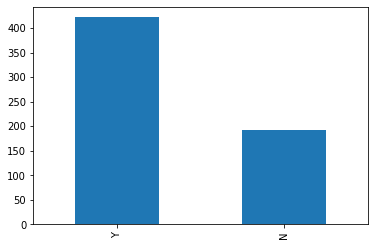

In [19]:
train['Loan_Status'].value_counts().plot.bar()

# Plotting the percentage of Gender,Married,Self Employed,Credit History for analyzing the data in Training File

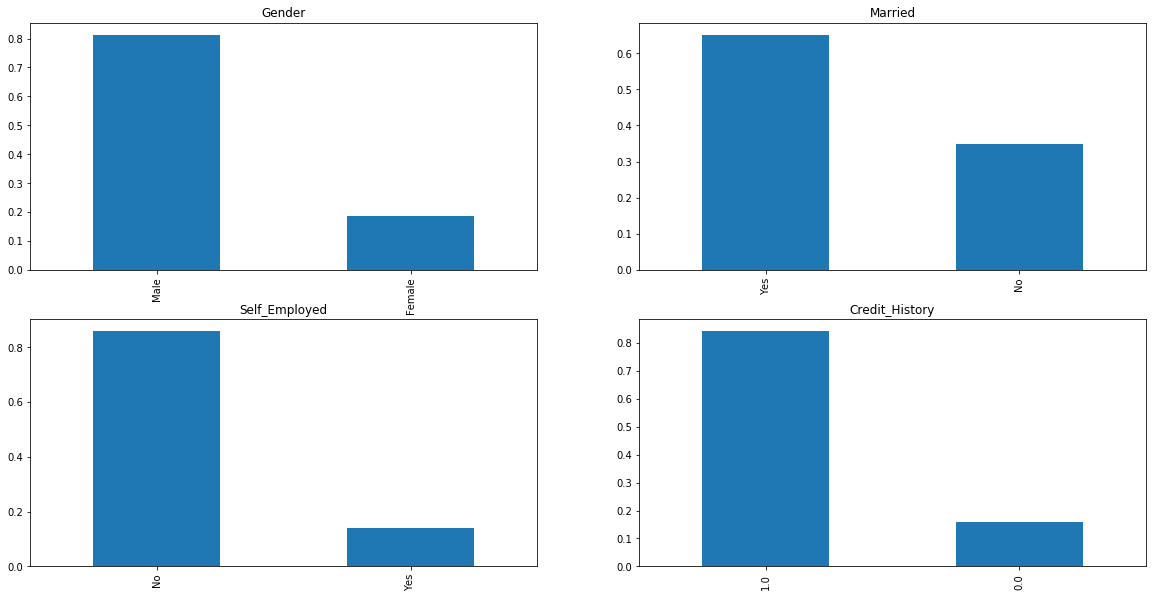

In [22]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

# Similarly Analyzing Dependants,Education,Property Area

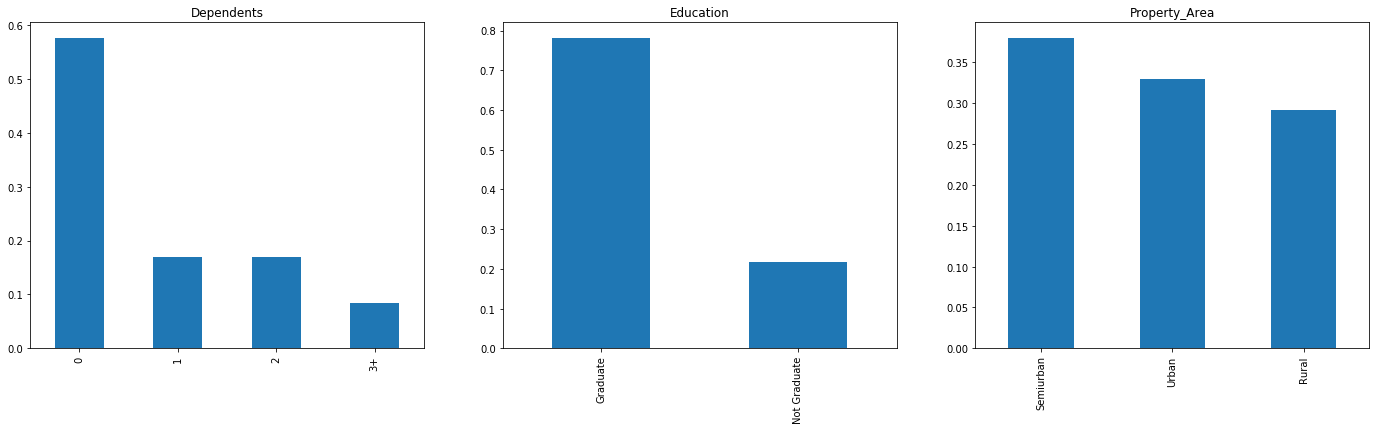

In [23]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

# Analyzing Applicant Income

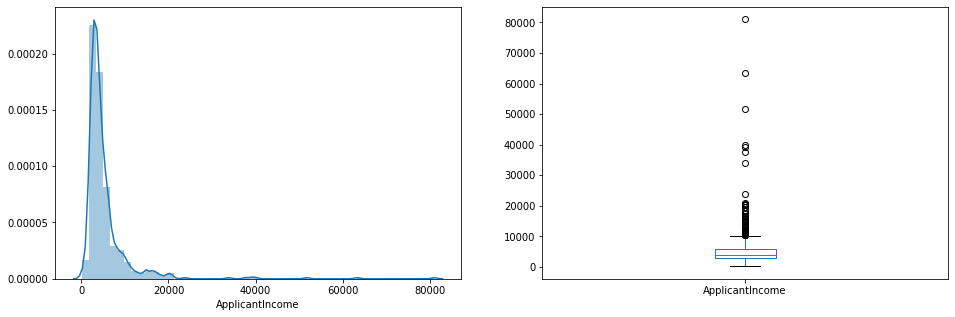

In [27]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

# A comparison of Applicant Income and Education

Text(0.5, 0.98, '')

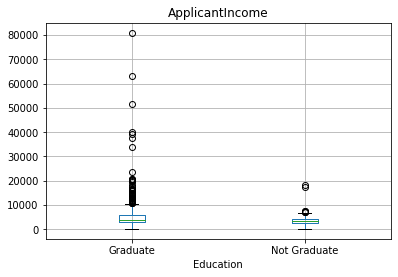

In [28]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

# Analysis of Co Applicant Income

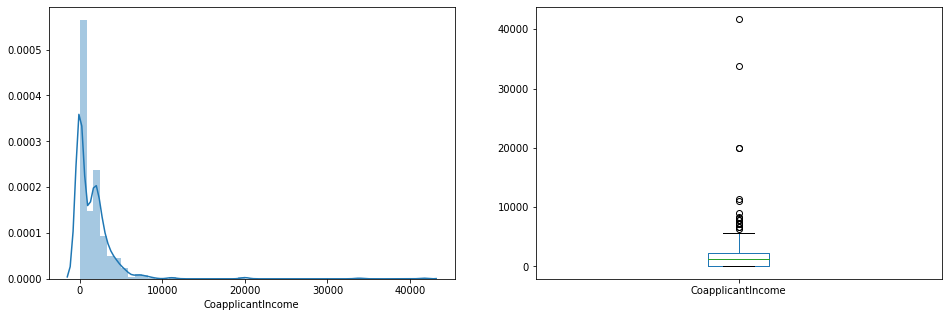

In [29]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

#Data of Applied Loan Amount 

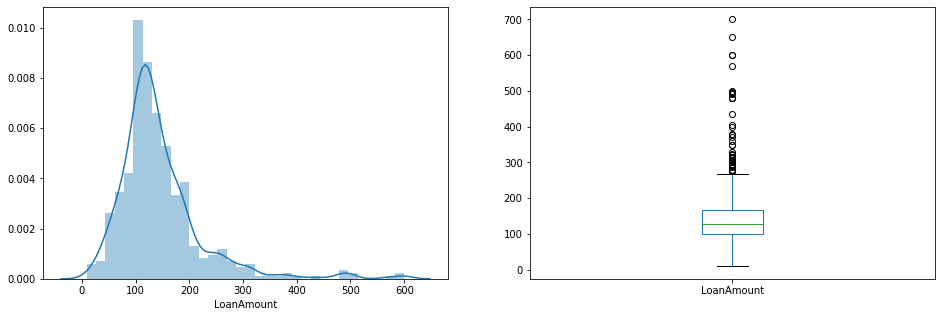

In [31]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

# Loan Status Comparison based on Gender

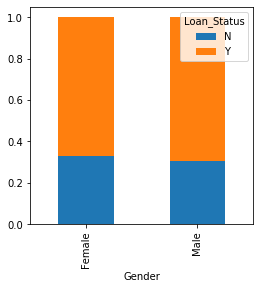

In [32]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Loan Status Of Different Categories

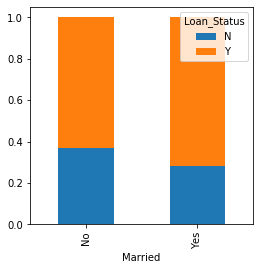

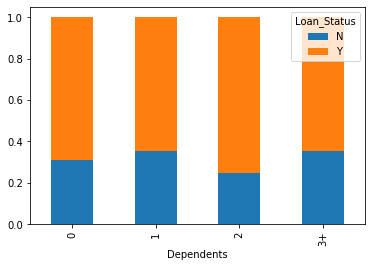

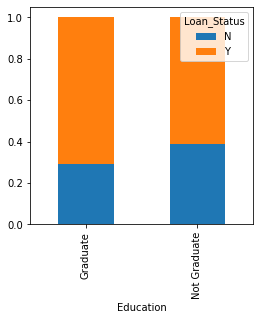

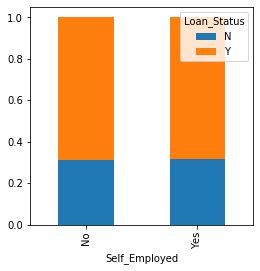

In [33]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

# Loan Status Based on Credit History and Property area

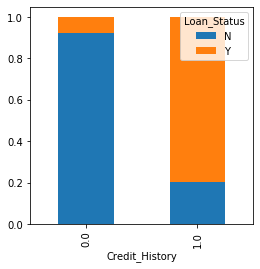

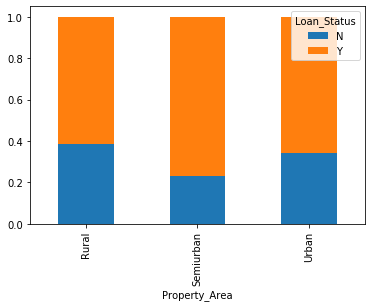

In [34]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

# Applicant Income and Loan Status

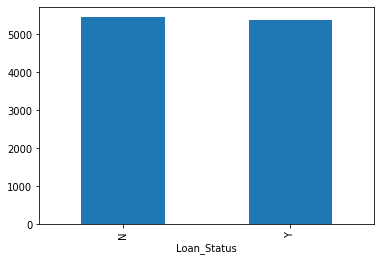

In [38]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# Applicant Income and Loan Status Studied in Detail

In [41]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

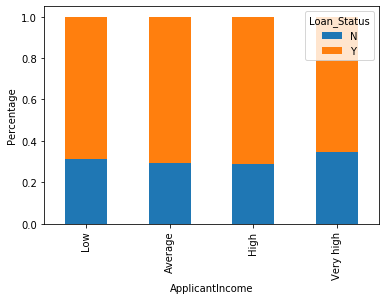

In [42]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

# Co Applicant Income and Loan Status Studied in Detail

In [45]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

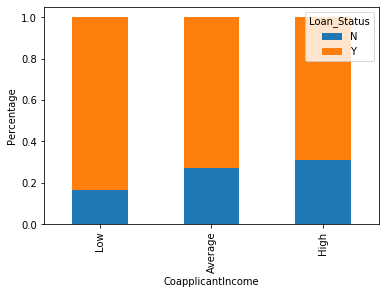

In [46]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

# Total Income and Loan Status Studied in detail

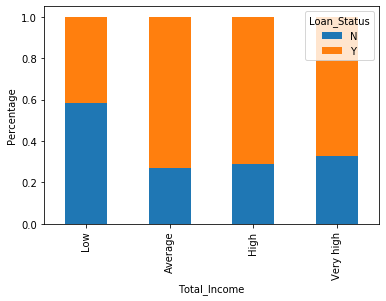

In [48]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

# Analysis of Loan Amount and Loan Status

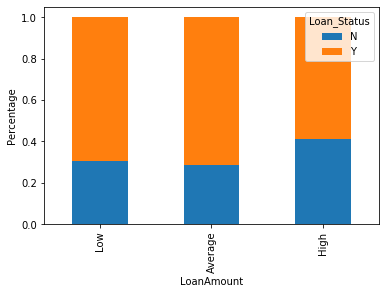

In [50]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

# By Observing the data, we found Dependands have a 3+ entry in it, so need to replace it. Also Loan Status with 0 and 1

In [51]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

# Plotting a correlation Matrix to find the correlation of different features (Dark means more correlation)

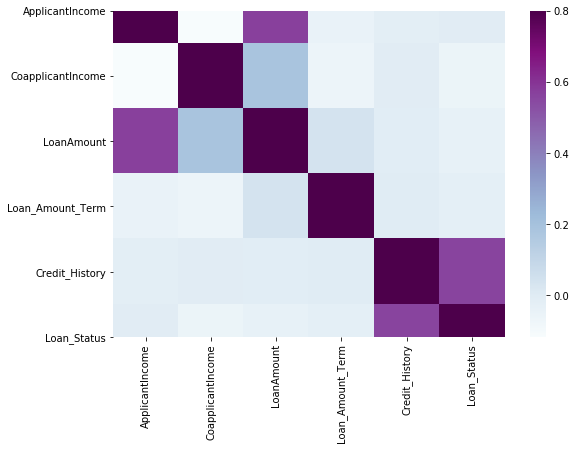

In [53]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Before Putting data into Network, we need to remove nul values. So find out how many null values are there in training data

In [58]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Filling Null Values with mode value

In [59]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

# Loan Amount is a bit different, so it was analyzed first 

In [62]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [63]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

# Similarly fill NA of LoanAmount with median

In [65]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Checking Null Again

In [67]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Now the train data is ready to use.

# Do the similar steps for test data also

In [68]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Comparing Training and Tesing Data Loan Amounts

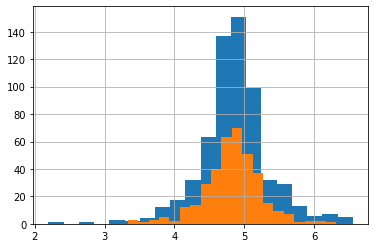

In [71]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20) 

# Since Loan ID is not required for analysis, Drop it

In [72]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

# Also Seperating the Loan Status column from Train Data

In [73]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

# Making The Dummies for working on it

In [75]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

# Starting with the Machine Learning Part

# First seperate Train Data (70 % for training and 30% for testing)

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

# Using Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=100,intercept_scaling=1,solver='saga',max_iter=10000) 
model.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

# Model has been generated, need to put x_cv to generate the prediction

In [78]:
pred_cv = model.predict(x_cv)

# Now pred_cv has our generated prediction and y_cv has actual prediction

In [79]:
accuracy_score(y_cv,pred_cv)

0.7081081081081081

# Now load the actual test file to the model  for prediction

In [ ]:
pred_test = model.predict(test)

# pred_test contains the result

# Now read the submission file for uploading and edit it with the result

In [82]:
submission=pd.read_csv("submission.csv")

In [83]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

# Conversion of boolean to Y and N

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# Saving it to csv file

In [89]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',mode = 'w', index=False)

In [92]:
import webbrowser
url = 'https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#SolutionChecker'
webbrowser.open(url)

True

# You can upload the logistic.csv in the site opened and check your accuracy

# Thankyou for going through the Project